In [45]:
pip install pmdarima

In [46]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("/content/sample_data/international-airline-passengers.csv",parse_dates=["Month"],index_col=["Month"])

In [8]:
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


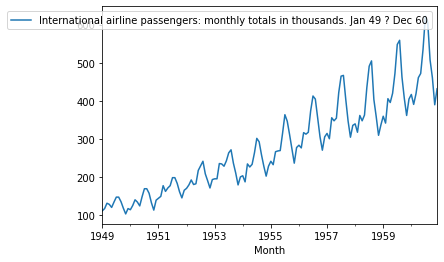

In [9]:
df.plot()

In [15]:
def checkStationary(df):
  res=adfuller(df)
  p_val=res[1]
  if p_val>0.05:
    print("Not Stationary")
  else:
    print("Stationary")

In [19]:
checkStationary(df)

Not Stationary


In [20]:
checkStationary(df.diff().diff().dropna())  # getting stationary after 2 diff

Stationary


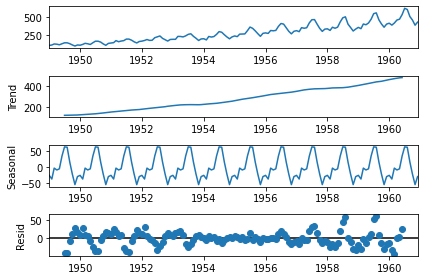

In [21]:
# Seasonal Decomposition
from statsmodels.api import tsa
decom=tsa.seasonal_decompose(df)
fig=decom.plot()


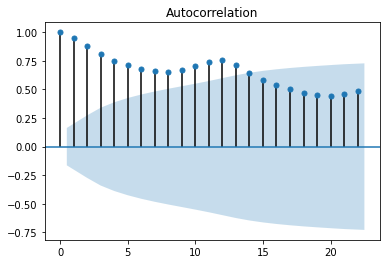

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plot_acf(df)

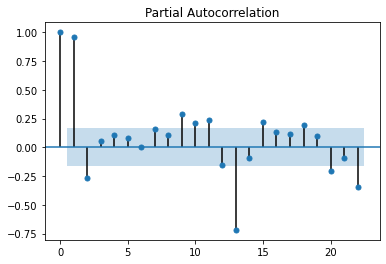

In [23]:
fig=plot_pacf(df)

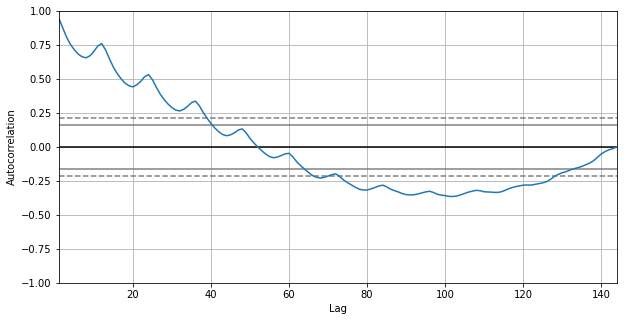

In [25]:
fig=plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(df)

**AutoRegression Model**

In [26]:
from statsmodels.tsa.ar_model import AR
ar=AR(df)
model_fit=ar.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
/usr/lo

In [27]:
print("Selected lag order by AR model is",model_fit.k_ar)

Selected lag order by AR model is 13


In [28]:
print(model_fit.params)

const                                                                                 5.148972
L1.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60     0.760839
L2.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    -0.085279
L3.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60     0.044238
L4.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    -0.041790
L5.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60     0.054281
L6.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    -0.052773
L7.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60     0.033219
L8.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    -0.099693
L9.International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60     0.145556
L10.International airline passengers: monthly tota

In [29]:
ypred=model_fit.predict()

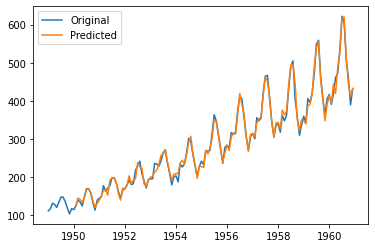

In [31]:
plt.plot(df,label="Original")
plt.plot(ypred,label="Predicted")
plt.legend()

In [32]:
df.tail()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [33]:
#1960-12-01 to 1961-12-01
forecast=model_fit.predict(start="1960-12-01",end="1961-12-01")
forecast

1960-12-01    432.873609
1961-01-01    449.539299
1961-02-01    419.018440
1961-03-01    449.070774
1961-04-01    496.285946
1961-05-01    519.569404
1961-06-01    586.985772
1961-07-01    683.173386
1961-08-01    658.360220
1961-09-01    561.569673
1961-10-01    503.999788
1961-11-01    430.618176
1961-12-01    470.296712
Freq: MS, dtype: float64

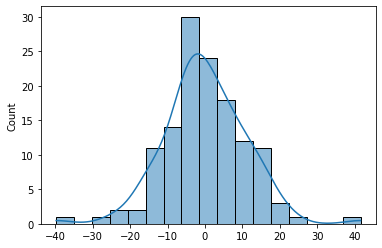

In [34]:
res=model_fit.resid
sns.histplot(res,kde=True)

**Auto ARIMA**

In [36]:
auto_arima1=auto_arima(df,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

**ARIMA Model**

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model=ARIMA(df,order=(9,1,3))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

In [41]:
ypred_arima=model_fit.predict()


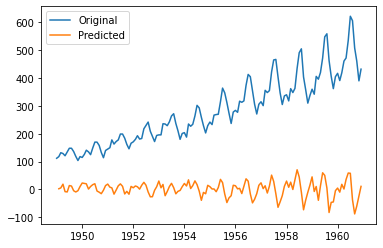

In [42]:
plt.plot(df,label="Original")
plt.plot(ypred_arima,label="Predicted")
plt.legend()

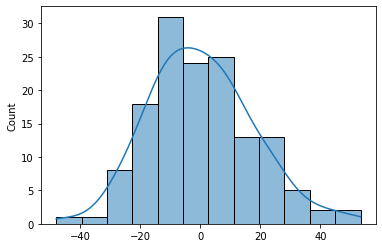

In [43]:
res=model_fit.resid
sns.histplot(res,kde=True)

**SARIMA** 

In [47]:
auto_arima2=auto_arima(df,trace=True,seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.23 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.95 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.34 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.97 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.14 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.33 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.83 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.81 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.74 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.10 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.07 sec
 ARIMA(3,1,1)(0,1,0

In [ ]:
#Best model:  ARIMA(2,1,1)(0,1,0)[12]    

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df,order=(2,1,1),seasonal_order=(0,1,0,12))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [49]:
ypred_sarima=model_fit.predict()

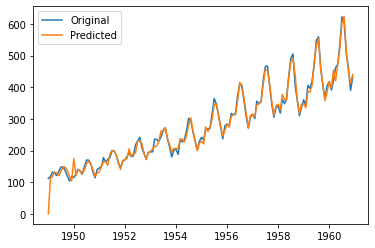

In [50]:
plt.plot(df,label="Original")
plt.plot(ypred_sarima,label="Predicted")
plt.legend()

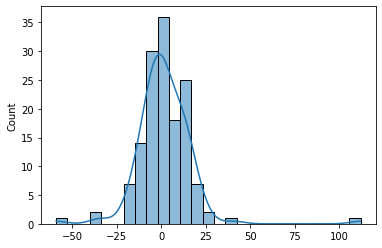

In [51]:
res=model_fit.resid
sns.histplot(res,kde=True)